In [1]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df['Gender'] = df['Gender'].replace({"Male": 0, "Female": 1})
df = df.drop(['CustomerID'], axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [4]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

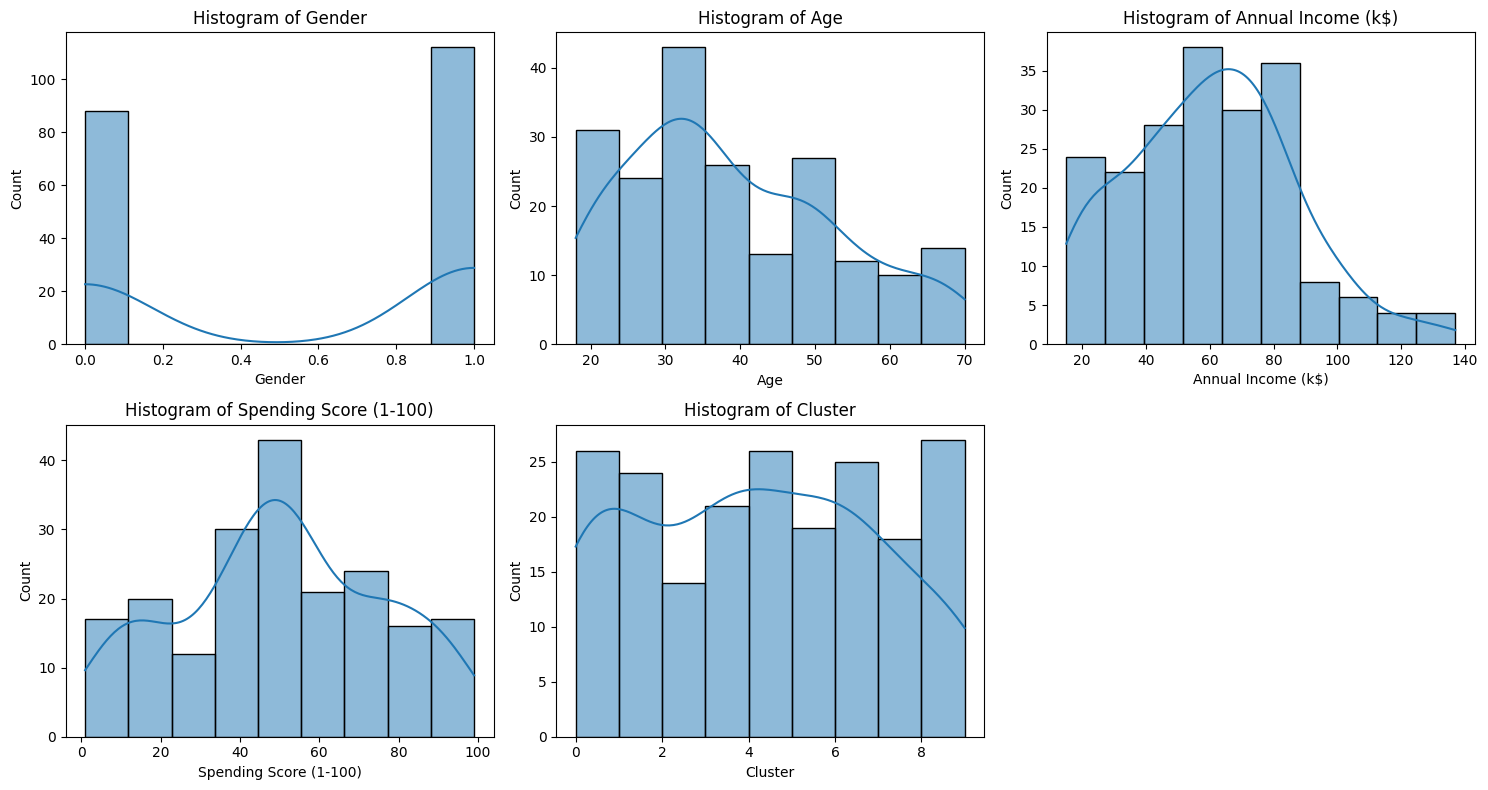

In [12]:
import math
num_cols = df.select_dtypes(include=['number']).columns
n = len(num_cols)

# Calculate appropriate rows and columns
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [13]:
# IQR method for all 23 features
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter data: keep only rows within 1.5*IQR range for all features
data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,2
3,1,23,16,77,8
4,1,31,17,40,2
...,...,...,...,...,...
193,1,38,113,91,3
194,1,47,120,16,9
195,1,35,120,79,3
196,1,45,126,28,9


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

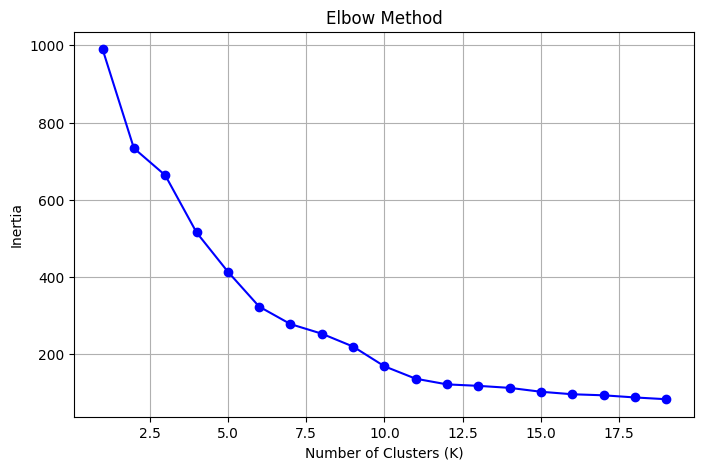

In [15]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

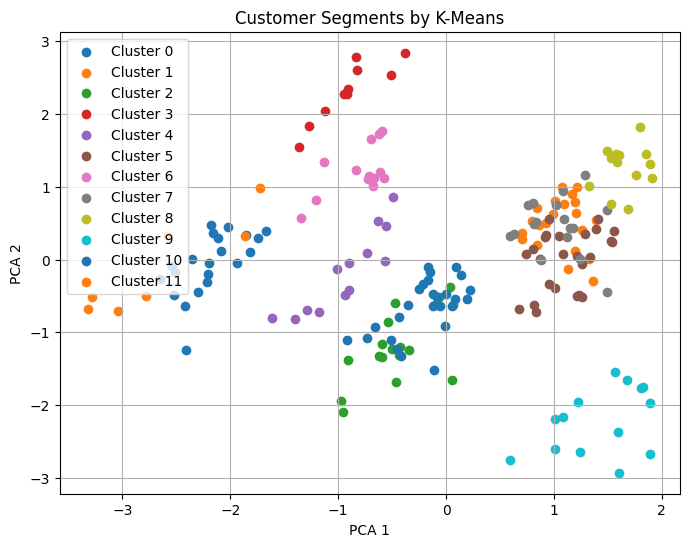

In [27]:
k = 12
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(scaled_data)
data['Cluster'] = labels

# 5. Visualize clusters with PCA (2D)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(pca_data[labels == i, 0], pca_data[labels == i, 1], label=f'Cluster {i}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments by K-Means')
plt.legend()
plt.grid()
plt.show()

In [26]:
# 6. Evaluate using Silhouette Score
score = silhouette_score(scaled_data, labels)
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.3990
